This notebook creates a 2 layer network of LIF neurons, in which both layers have the same behaviour and are affected by the same input current, at each time step of the simulation. <br/>
The two layers are fully connected and each synapse has a weight and a delay associated. <br/>

The spiking behaviour of the neurons in the two layers is shown and the values taken by the external current are displayed as well.

In [19]:
from brian2 import *
%matplotlib inline

Project to simulate a more complex network that has a single input neuron that receives a random time dependent current strength, and is connected to a single hidden neuron. 
Both neuron dynamics are given by the same set of equations defined in __eqs_neuron__.

We start by defining the set of parameters needed.

In [20]:
start_scope()

v_rest = 0*mV
v_thr = 10*mV
tau_m = 10*ms
In_cur = TimedArray((10+5*randn(500))*mV, dt = 0.1*ms)

Again we use the __start_scope()__ function to ensure that there are no clashes between the simulations run in this notebook.<br/>
__v_rest__ represents the resting voltage potential of the neurons.<br/>
__v_thr__ sets the spiking threshold of the neurons.<br/>
__tau_m__ is the membrane time constant.<br/>
__In_curr__ is a funtion of time that is created using an array of given values (in this case they are random numbers scaled to a desired interval), the values of the array are set at a time distance that is given by the __dt__ parameter.<br/>

In [21]:
eqs_neuron = '''
dv/dt = -(v - v_rest - I) / tau_m : volt (unless refractory)
I = In_cur(t) : volt
'''

The neuron equations describe the behaviour of the neurons, in this case Leaky Integrate and Fire model. <br/>
The __(unless refractory)__ specification ensures that the differential equation determines the behaviour of v unless it's refractory in which case it is switched off.<br/>
The next line specifies that __I__ is a function of time, and takes values from the __In_cur__ time array.<br/>

In [22]:
In_layer = NeuronGroup(1, model=eqs_neuron, threshold = 'v>v_thr', reset='v=v_rest', refractory=5*ms)
In_layer.v = [5*mV]

We create a single input neuron that will spike iff the voltage potential __v__ has a value greater than the set threshold. Once a neuron has spiked the voltage of the neuron is set to its resting value __v_rest__. finally we specify the refractory period of the neuron, a period of time during which the neuron's voltage is not affected by the input current or any spikes received, its voltage staying constant in the resting state.<br/>
We also set the starting value of the input neuron's voltage to a value that is greater than the resting state value.<br/>

In [23]:
Hidd_layer = NeuronGroup(1, model=eqs_neuron, threshold='v>v_thr', reset='v=v_rest', refractory=0*ms)
Hidd_layer.v = [0*mV]

The hidden layer neurons follow the same behaviour as the input layer neurons, dynamics described by the equations given above.<br/>
We set the voltage potential of the neuron to 0 mV, as the neuron is inactive before any spikes are sent by input layer neurons.<br/>
Next we need to connect the two layers, so we define equations that describe the behaviour of the connections, in __eqs_synapse__.

In [24]:
eqs_synapse = '''
w:1
'''

In this case we are specifying that each synapse that is created using these equations has a parameter w that represents the connection's weight.

In [25]:
Synapse = Synapses(In_layer, Hidd_layer, eqs_synapse, on_pre='v_post+=w*mV')
Synapse.connect(i=In_layer, j=Hidd_layer)

We have created a __Synapse__ object that will have a behaviour described by the equations in __eqs_synapse__.<br/>
Also the behaviour of the neurons in the hidden layer once they receive a spike from the previous layer is described by the equation specified for __on_pre__. In this case every time a hidden neuron receives a spike from the previous layer, it's voltage potential is increased with the value of the weight associated with the synapse on which the spike was sent.

In [26]:
Synapse.w = '0.3'
Synapse.delay = '2*ms'

For now the weight of the connection is set to a value we have chosen. <br/>
A delay can be associated with the synapses as well. This is done by assigining a value to the __delay__ parameter of the __Synapse__ object created before

In [27]:
trace_In = StateMonitor(In_layer, ['v','I'], record=True)
trace_Hidd = StateMonitor(Hidd_layer, 'v', record=True)

Define a set of tracing objects to record the values of the voltage and current paramters for the neurons in both layers.

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.03s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'linear' (took 0.03s). [brian2.stateupdaters.base.method_choice]


([<matplotlib.axis.YTick at 0xb0ad5f8>,
 <a list of 5 Text yticklabel objects>)

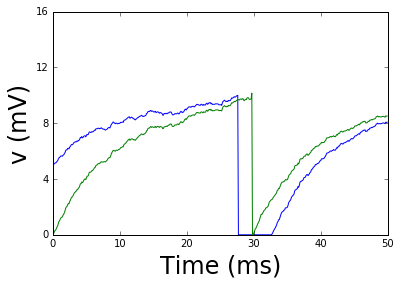

In [28]:
run(50*ms)
figure(1)
plot(trace_In.t/ms, trace_In.v[0]/mV, '-b', label='Input Neuron')
plot(trace_Hidd.t/ms, trace_Hidd.v[0]/mV, '-g', label='Hidden Neuron')
xlabel('Time (ms)', fontsize=24)
ylabel('v (mV)', fontsize=24)
yticks([0,4,8,12,16])

Display the voltage values of the input layer and hidden layer neurons over the course of the simulation.

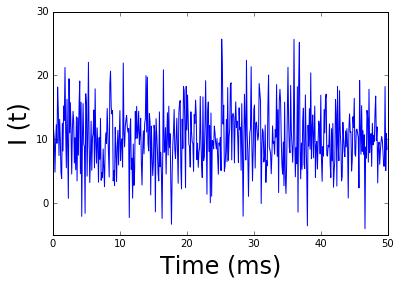

In [29]:
figure(2)
plot(trace_In.t/ms, trace_In.I[0]/mV, '-b', label='Input Neuron')
xlabel('Time (ms)', fontsize=24)
ylabel('I (t)', fontsize=24)
yticks([0,10,20,30])
show()

Display the current values that are applied to the input neuron at each time step of the simulation.